In [234]:
################################################### top2vec ####################################################

In [235]:
import pandas as pd
import sys
from top2vec import Top2Vec
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import punkt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import umap.umap_ as umap
import umap.plot

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:

def explore_nopd_topics():
    stop = stopwords.words("english")
    df = pd.read_csv("../data/fuse/com_new_orleans_so.csv").astype(str)
    df["allegation_desc"] = df["allegation_desc"].apply(
        lambda x: " ".join([word for word in x.split() if word not in (stop)])
    )

    df.loc[:, "topics"] = " ".join(x for x in df["allegation_desc"].astype(str))
    df = df["topics"][0]
    df = df.split()

    counts = Counter(df)
    most_occur = counts.most_common(50)
    print(most_occur)
    return df


In [237]:
explore_nopd_topics()

[('late', 515), ('reported', 485), ('duty.', 481), ('failed', 471), ('accused', 310), ('inmate', 155), ('observed', 145), ('complete', 127), ('deputy', 98), ('training.', 97), ('report', 90), ('duty', 89), ('uof', 83), ('mandatory', 81), ('refused', 76), ('proper', 72), ('inmates', 69), ('work', 65), ('rank', 58), ('found', 57), ('without', 56), ('inmate.', 56), ('minutes', 55), ('call.', 54), ('activate', 53), ('body', 52), ('rank.', 48), ('bwc', 48), ('left', 47), ('reporting', 47), ('worn', 43), ('camera', 41), ('cell', 39), ('attend', 39), ('duty/roll', 37), ('leaving', 37), ('allowed', 37), ('unprofessional', 37), ('working', 37), ('incident.', 36), ('uniform', 35), ('call', 35), ('incident', 34), ('assigned', 34), ('instructed', 34), ('pod', 33), ('admitted', 32), ('failure', 32), ('multiple', 32), ('verbal', 31)]


['refused',
 'assignment.',
 'left',
 'work',
 'without',
 'informing',
 'rank.',
 'reporting',
 'late',
 'duty.',
 'reported',
 'late',
 'duty/roll',
 'call.',
 'admitted',
 'clocking',
 'leaving',
 'work',
 'without',
 'permission.',
 'failed',
 'submit',
 'statement',
 'uof',
 'incident.',
 'accused',
 'clocking',
 'work',
 'various',
 'days;',
 'however,',
 'could',
 'located',
 'rank.',
 'failed',
 'conduct',
 'mandatory',
 'shakedown',
 'unit',
 'month',
 'may.',
 'failure',
 'complete',
 'proper',
 'observations',
 'rounds.',
 'accused',
 'telling',
 'inmate',
 'suck',
 'penis.',
 'accused',
 'completing',
 'two',
 'cell',
 'inspections',
 'per',
 'shift.',
 'accused',
 'completing',
 'reports',
 'two',
 'love',
 'letters',
 'received',
 'inmate.',
 'jpso',
 'found',
 '90',
 'grams',
 'cocaine',
 'home.',
 'failed',
 'activate',
 'bwc',
 'uof',
 'incident',
 'unit',
 'one.',
 'lieutenant',
 'crump',
 'sign',
 'temperator',
 'log',
 'refrigerator.',
 'reported',
 'late',
 'duty.'

In [238]:
# bigrams = [word for word in model.vocab if len(word.split()) == 2]
# print(bigrams[:20])

In [239]:

def create_model(df):
    df = df.astype(str)
    docs = [x for x in df["allegation_desc"]]
    # unique = [x for x in df["allegation_topic_uid"]]

    model = Top2Vec(
        docs,
        ngram_vocab=True,
        speed="deep-learn",
        use_embedding_model_tokenizer=True,
        min_count=5,
        # document_ids=unique
    )
    return model

In [240]:
def model():
    df = pd.read_csv("../data/fuse/com_new_orleans_so.csv")\
    .pipe(create_model)
    return df

In [241]:
model = model()

2022-10-21 16:37:51,218 - top2vec - INFO - Pre-processing documents for training
2022-10-21 16:37:51,258 - top2vec - INFO - Creating joint document/word embedding
2022-10-21 16:38:17,063 - top2vec - INFO - Creating lower dimension embedding of documents
2022-10-21 16:38:31,804 - top2vec - INFO - Finding dense areas of documents
2022-10-21 16:38:31,920 - top2vec - INFO - Finding topics


In [242]:
if len(model.get_topic_sizes()) > 1:
    topic_words, word_scores, topic_nums = model.get_topics()
    for words, scores, num in zip(topic_words, word_scores, topic_nums):
        print(num)
        print(f"Words: {words}")

0
Words: ['minutes' 'late' 'reported' 'mandatory training' 'manadatory' 'scheduled'
 'complete mandatory' 'rounds' 'class' 'training class'
 'verbal altercation' 'show' 'no call' 'no show' 'roll call' 'duty'
 'uniform shirt' 'take assignment' 'in verbal' 'mandatory'
 'proper observations' 'do so' 'test' 'insructed' 'observations' 'for'
 'fratinize with' 'as insructed' 'no' 'attend manadatory' 'co worker'
 'assignment as' 'observation rounds' 'training' 'proper uniform'
 'as instructed' 'attend' 'failure' 'altercation with' 'reporting' 'call'
 'multiple occasion' 'proper' 'uof report' 'obtaining' 'required facility'
 'hospital' 'contraband' 'active body' 'engaged']
1
Words: ['worn camera' 'worn' 'activate body' 'body worn' 'submit uof' 'hour'
 'attend' 'report within' 'as scheduled' 'body' 'active' 'activate' 'uof'
 'camera' 'submit' 'frame' 'within' 'not completing' 'uof report'
 'hour time' 'fight' 'palce' 'threatening' 'attend manadatory'
 'uof incident' 'incident' 'other inmates' 't

In [243]:
topic_sizes, top_nums = model.get_topic_sizes()
print(topic_sizes)
print(top_nums)

[378  95  87  76  70  70  66  66  65  65  64  63  57  56  54  52  52  50
  48  48  42  41  40  38  38  36  34  31  27  25  24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [244]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=10)

for doc, score, doc_id in list(zip(documents, document_scores, document_ids)):
    print(f"Document: {doc_id}, Score: {score}")
    print("--------------------")
    print(doc)
    print("--------------------")

Document: 1316, Score: 0.9345394968986511
--------------------
failed to complete orleans justice center dailey lineup accused of being.
--------------------
Document: 1559, Score: 0.9145405292510986
--------------------
nan
--------------------
Document: 1892, Score: 0.9141362905502319
--------------------
nan
--------------------
Document: 1792, Score: 0.9107856154441833
--------------------
nan
--------------------
Document: 1779, Score: 0.9102882146835327
--------------------
nan
--------------------
Document: 1642, Score: 0.908026933670044
--------------------
nan
--------------------
Document: 1957, Score: 0.9050429463386536
--------------------
nan
--------------------
Document: 1578, Score: 0.9048072695732117
--------------------
nan
--------------------
Document: 651, Score: 0.9001740217208862
--------------------
nan
--------------------
Document: 650, Score: 0.8423519134521484
--------------------
observed pushing a handcuffed inmate backwards over a bench.
-----------------

In [245]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=5, num_docs=10)

ents = {(doc, score) for doc, score in list(zip(documents, document_scores))}
df = pd.DataFrame(ents, columns=["doc", "score"])
print(df)
# df.loc[:, "topic"] = "30"
# df.to_csv("../data/raw/new_orleans_pd/topics/topic_30.csv", index=False)

                                                 doc     score
0    allowed inmated to congregate by deputies desk.  0.818130
1    allowed inmated to congregate by deputies desk.  0.817003
2          failed to clock out when ordered by rank.  0.842672
3          failed to clock out when ordered by rank.  0.822302
4       allowed inmated to throw water on an inmate.  0.793039
5          failed to clock out when ordered by rank.  0.861389
6    allowed inmated to congregate by deputies desk.  0.828451
7    allowed inmated to congregate by deputies desk.  0.815933
8  inmate refused to stop masturbating/ deputy th...  0.873730
9                observed horse playing with inmate.  0.799587


In [246]:
# model.save("../data/topic_modelling/model/")

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in

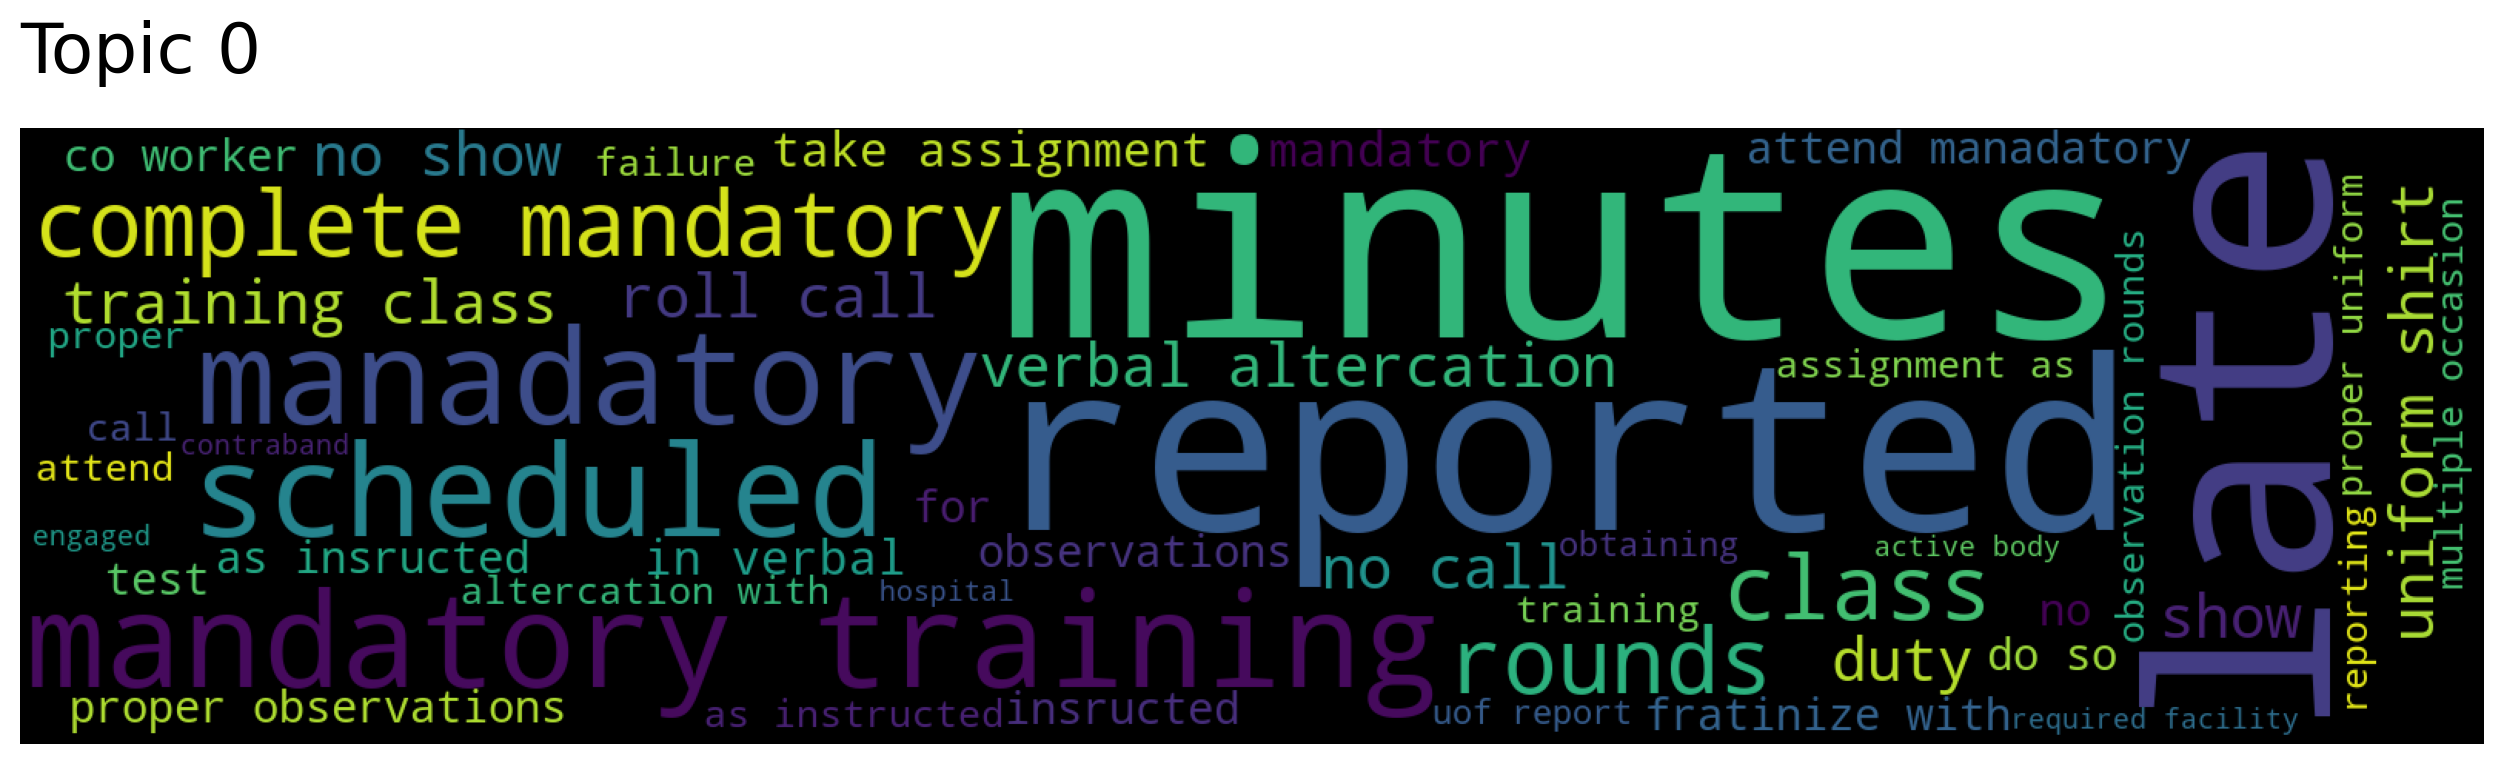

In [247]:
model.generate_topic_wordcloud(0)

In [248]:
model.topic_words

array([['minutes', 'late', 'reported', ..., 'contraband', 'active body',
        'engaged'],
       ['worn camera', 'worn', 'activate body', ...,
        'unauthorized detail', 'in timely', 'placing'],
       ['orleans justice', 'center', 'orleans', ..., 'unauthorized',
        'assignment', 'leave'],
       ...,
       ['observations', 'proper observations', 'failure', ..., 'engaged',
        'altercation', 'bringing'],
       ['found not', 'worn', 'activate', ..., 'case', 'lunch break',
        'approval'],
       ['co worker', 'involved', 'verbal', ..., 'shirt', 'found',
        'notifying']], dtype='<U21')

In [249]:
model.topic_words[0]

array(['minutes', 'late', 'reported', 'mandatory training', 'manadatory',
       'scheduled', 'complete mandatory', 'rounds', 'class',
       'training class', 'verbal altercation', 'show', 'no call',
       'no show', 'roll call', 'duty', 'uniform shirt', 'take assignment',
       'in verbal', 'mandatory', 'proper observations', 'do so', 'test',
       'insructed', 'observations', 'for', 'fratinize with',
       'as insructed', 'no', 'attend manadatory', 'co worker',
       'assignment as', 'observation rounds', 'training',
       'proper uniform', 'as instructed', 'attend', 'failure',
       'altercation with', 'reporting', 'call', 'multiple occasion',
       'proper', 'uof report', 'obtaining', 'required facility',
       'hospital', 'contraband', 'active body', 'engaged'], dtype='<U21')

In [250]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['minutes' 'late' 'reported' 'mandatory training' 'manadatory' 'scheduled'
 'complete mandatory' 'rounds' 'class' 'training class'
 'verbal altercation' 'show' 'no call' 'no show' 'roll call' 'duty'
 'uniform shirt' 'take assignment' 'in verbal' 'mandatory'
 'proper observations' 'do so' 'test' 'insructed' 'observations' 'for'
 'fratinize with' 'as insructed' 'no' 'attend manadatory' 'co worker'
 'assignment as' 'observation rounds' 'training' 'proper uniform'
 'as instructed' 'attend' 'failure' 'altercation with' 'reporting' 'call'
 'multiple occasion' 'proper' 'uof report' 'obtaining' 'required facility'
 'hospital' 'contraband' 'active body' 'engaged']


Topic Number:  1
Words: ['worn camera' 'worn' 'activate body' 'body worn' 'submit uof' 'hour'
 'attend' 'report within' 'as scheduled' 'body' 'active' 'activate' 'uof'
 'camera' 'submit' 'frame' 'within' 'not completing' 'uof report'
 'hour time' 'fight' 'palce' 'threatening' 'attend manadatory'
 'uof inciden

In [251]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["inmate"], num_topics=5)
for word, w_score, topic, t_score in list(zip(topic_words, word_scores, topic_scores, topic_nums)):
    print(f"Word: \n{word}")
    print("--------------------")
    print(f"Word Score \n{w_score}")
    print("--------------------")
    print(f"Topic Score: \n{topic}")
    print("--------------------")
    print (f"Topic # \n{t_score}")
    print("--------END---------")

Word: 
['however' 'any' 'employee' 'assist' 'down' 'clock' 'captain' 'early'
 'video' 'leave' 'up' 'head' 'times' 'off' 'deputy menina' 'was' 'opso'
 'immediately' 'agent' 'job' 'could' 'stated' 'about' 'playing' 'deputy'
 'she' 'take' 'so' 'relationship' 'made' 'hands' 'quit' 'walked'
 'as insructed' 'media' 'reassigned' 'hair' 'turn' 'with' 'face' 'inmates'
 'knowledge several' 'posted' 'do' 'several' 'refused' 'between' 'desk'
 'on' 'meeting']
--------------------
Word Score 
[0.8883916  0.84026736 0.78006124 0.7725181  0.7542557  0.7506277
 0.7493995  0.73617977 0.7333035  0.6929678  0.6710731  0.66692615
 0.6575941  0.6484101  0.64774626 0.6442618  0.64357287 0.63791376
 0.63299555 0.62901753 0.62610424 0.6223358  0.6107984  0.6106129
 0.6079901  0.6078221  0.6049549  0.60272384 0.60042495 0.59302086
 0.5894767  0.5857828  0.58573526 0.57276475 0.5719919  0.56853694
 0.5655532  0.5643374  0.5601329  0.5570712  0.557028   0.5544888
 0.5544272  0.5497135  0.5494804  0.5456147  0.543

In [252]:
# model = Top2Vec.load("../data/topic_modelling/model/")

# umap_args = {
#     "n_neighbors": 15,
#     "n_components": 2, # 5 -> 2 for plotting 
#     "metric": "cosine",
# }
# umap_model = umap.UMAP(**umap_args).fit(model.topic_vectors)
# umap.plot.points(umap_model, labels=model.doc_top_reduced)

In [253]:
############################################################ bert #################################################################

In [254]:
from bertopic import BERTopic
import json

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\image_utils.py:239: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  def resize(self, image, size, resample=PIL.Image.BILINEAR, default_to_square=True, max_size=None):
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\image_utils.py:396: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  def rotate(self, image, angle, resample=PIL.Image.NEAREST, expand=0, center=None, translate=None, fillcolor=None):
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\bertopic\_utils.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


In [255]:
def preprocess_noso(df):
    return df[~((df.allegation_desc.fillna("") == ""))]

In [256]:
cprr = pd.read_csv("../data/fuse/com_new_orleans_so.csv")
cprr = cprr.pipe(preprocess_noso)


In [257]:
cprr.shape

(1950, 14)

In [258]:
docs = cprr.allegation_desc

In [259]:
docs = json.loads(docs.to_json(orient='records'))

In [260]:
docs[0]

'refused an assignment.'

In [261]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [262]:
topic, probs = topic_model.fit_transform(docs)

In [263]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,259,-1_was_of_accused_deputy
1,0,365,0_reported_late_duty_for
2,1,98,1_unprofessional_manner_accused_towards
3,2,69,2_mandatory_training_complete_failed
4,3,57,3_uniform_shirt_found_proper
5,4,51,4_leaving_accused_of_shift
6,5,48,5_inmate_medical_upon_obtaining
7,6,44,6_inmate_an_giving_admitted
8,7,41,7_refused_assignment_insructed_take
9,8,41,8_report_as_he_instructed


In [264]:
topic_model.get_topic(3)

[('uniform', 0.16682595721383184),
 ('shirt', 0.1413213009476535),
 ('found', 0.1189627317583911),
 ('proper', 0.11751792180214929),
 ('be', 0.11735038365206914),
 ('in', 0.08139178077913774),
 ('not', 0.07253953208796908),
 ('laundry', 0.06461106384112199),
 ('cold', 0.06275980508088036),
 ('room', 0.056891701560550574)]

In [265]:
topic_model.get_representative_docs(3)

['found not to be in proper uniform shirt.',
 'found not to be in proper uniform shirt.',
 'found not to be in proper uniform shirt.']

In [266]:
topic_model.visualize_topics()

In [267]:
topic_model.visualize_barchart()

In [268]:
df_bert = pd.DataFrame({"topic": topic, "documents": docs})

In [269]:
df_bert

,topic,documents
0,7,refused an assignment.
1,40,left work without informing her rank.
2,15,reporting late for duty.
3,12,reported late for duty/roll call.
4,4,admitted to clocking out and leaving work with...
...,...,...
1945,0,reported late for duty.
1946,2,failed to complete mandatory training.
1947,4,obsserved clocking in and leaving the facility.
1948,10,reported 57 minutes late for duty.


In [270]:
############################################################ gensim ##############################################################################

In [271]:
import numpy as np
import json
import glob
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pandas as pd

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models

In [272]:
noso = pd.read_csv("../data/fuse/com_new_orleans_so.csv")

In [273]:
def preprocess_gensim(df):
    df = df.astype(str).fillna("").dropna()
    return df[~((df.allegation_desc.fillna("") == ""))].dropna()

In [274]:
noso = noso.pipe(preprocess_gensim)

In [275]:
docs = noso.allegation_desc

In [276]:
def lemmatization(descs, allowed_pos_tags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    final_text = []
    for desc in descs:
        doc = nlp(desc)
        new_text = " ".join([token.lemma_ for token in doc if token.pos_ in allowed_pos_tags])
        final_text.append(new_text)
    return (final_text)

In [277]:
lemmatized_texts = lemmatization(docs)

In [278]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [279]:
data_words = gen_words(lemmatized_texts)

In [280]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [281]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [282]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.429587 -0.370785       1        1  20.865832
6      0.101717 -0.477139       2        1   8.991258
8     -0.459982 -0.031137       3        1   6.186095
29     0.292409 -0.331675       4        1   5.788722
11     0.394646 -0.245796       5        1   5.597812
19     0.455843 -0.009010       6        1   5.361893
4      0.393094  0.256747       7        1   4.150833
13     0.198419 -0.281002       8        1   4.020254
2     -0.313620 -0.157016       9        1   3.835984
23    -0.061655 -0.381189      10        1   3.772147
10    -0.379394  0.089343      11        1   3.207824
22    -0.349032  0.205254      12        1   2.905280
18    -0.218754 -0.306526      13        1   2.330103
20     0.005544 -0.292662      14        1   2.248808
9      0.083690  0.420212      15        1   2.170045
26    -0.121386  0.385081      16        1   2.095141
25    -0.222860  0.294066      17        1   2.056523
1     -0.198590 -0.068015      18        1   1.936470
17     0.025267 -0.081916      19        1   1.690240
21     0.229404 -0.093144      20        1   1.528822
3      0.268095  0.075276      21        1   1.446671
24     0.217377  0.249413      22        1   1.435921
12    -0.138101  0.102501      23        1   1.379129
5      0.130277  0.227291      24        1   1.275578
28    -0.071055  0.225402      25        1   1.245245
15     0.027416  0.268473      26        1   1.070639
16     0.111118  0.083834      27        1   0.781919
27     0.009900  0.081374      28        1   0.208271
7      0.009900  0.081374      29        1   0.208271
0      0.009900  0.081374      30        1   0.208271, topic_info=         Term        Freq       Total Category  logprob  loglift
18     accuse  529.000000  529.000000  Default   30.000  30.0000
6        duty  717.000000  717.000000  Default   29.000  29.0000
14       fail  613.000000  613.000000  Default   28.000  28.0000
8      report  678.000000  678.000000  Default   27.000  27.0000
7        late  563.000000  563.000000  Default   26.000  26.0000
..        ...         ...         ...      ...      ...      ...
25      month    0.018293    1.179760  Topic30   -6.993   2.0075
26  shakedown    0.018293   11.475732  Topic30   -6.993  -0.2674
27       unit    0.018293   48.772884  Topic30   -6.993  -1.7143
28   complete    0.018293  131.474348  Topic30   -6.993  -2.7060
29    failure    0.018293   27.047911  Topic30   -6.993  -1.1248

[1343 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
18        3  0.990604    accuse
18       19  0.007547    accuse
171      21  0.851178       act
47       10  0.684892  activate
47       12  0.302627  activate
...     ...       ...       ...
71       12  0.887656     watch
104      12  0.982426      wear
5         7  0.993324      work
110      13  0.965993    worker
156      23  0.966456     write

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 7, 9, 30, 12, 20, 5, 14, 3, 24, 11, 23, 19, 21, 10, 27, 26, 2, 18, 22, 4, 25, 13, 6, 29, 16, 17, 28, 8, 1])